### Name: Safal Shrestha and Bolanle Oladeji
### Project: “That Password is too Easy to Guess”: A Comparison of Classification Algorithms for Password Strength Prediction

### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Read in dataset

In [25]:
password_data = pd.read_csv("data.csv")
df = password_data[["password", "strength"]]
df.dropna(inplace=True)
df["strength"] = df["strength"].map({'0': "Weak", '1': "Medium",'2': "Strong"})

/var/folders/ng/zh2dm1jd1tq2yswfx0d4j2700000gn/T/ipykernel_37466/1463674606.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  password_data = pd.read_csv("data.csv")
/var/folders/ng/zh2dm1jd1tq2yswfx0d4j2700000gn/T/ipykernel_37466/1463674606.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
/var/folders/ng/zh2dm1jd1tq2yswfx0d4j2700000gn/T/ipykernel_37466/1463674606.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["strength"] = df["strength"].map({'0': "Weak", '1': "Medium",'

In [26]:
df

,password,strength
0,kzde5577,Medium
1,kino3434,Medium
2,visi7k1yr,Medium
3,megzy123,Medium
4,lamborghin1,Medium
...,...,...
669873,10redtux10,Medium
669874,infrared1,Medium
669875,184520socram,Medium
669876,marken22a,Medium


### Data Cleaning: Remove NA values

In [27]:
#check for na values in each column
df.isna().sum()

password      0
strength    238
dtype: int64

In [28]:
df.dropna(inplace=True)

/var/folders/ng/zh2dm1jd1tq2yswfx0d4j2700000gn/T/ipykernel_37466/658506679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [39]:
# check for nas again

df.isna().sum()
#pwd_data = np.array(df)

password    0
strength    0
dtype: int64

In [41]:
# reduce data to 10000 rows due to computational constraints

df = df.head(10000)

### Data Visualization

<AxesSubplot:>

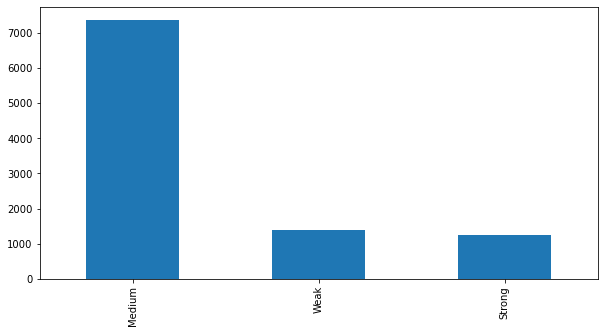

In [45]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 5))
# df['category'].value_counts()
df['strength'].value_counts().plot(kind='bar')
# creating the bar plot
# plt.bar(df["strength"].value_counts, df["strength"], color ='maroon',
#         width = 0.4)
#
# plt.xlabel("Number of Passwords")
# plt.ylabel("Strength of passwords")
# plt.title("Data Visualization of Password Strength")
# plt.show()

### Tokenization and Vectorizer

In [31]:
#tokenize data

def password_token(password):
    character=[]
    for i in password:
        character.append(i)
    return character

x = np.array(df["password"])
y = np.array(df["strength"])

#convert text into vectors (numbers) using TFIDF vectorizer

tdif = TfidfVectorizer(tokenizer=password_token)
x = tdif.fit_transform(x)
# x = x[~np.isnan(x)]
# y= y[~np.isnan(y)]


# Split data into training and testing

xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.10,
                                                random_state=42)
# xtrain = np.nan_to_num(xtrain)
# ytrain = np.nan_to_num(ytrain)
# xtrain = xtrain.fillna(xtrain.mean())
# ytrain = ytrain.fillna(xtrain.mean())

#np.isnan(xtrain.values.any())

In [32]:
# np.where(xtrain.values >= np.finfo(np.float64).max)

### Use Random Forest

In [33]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(xtrain,ytrain)
print(random_forest_model.score(xtest,ytest))

0.891


### Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
clf=DecisionTreeClassifier()

In [36]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [37]:
print("Accuracy :",clf.score(xtest, ytest))

Accuracy : 0.844


In [38]:
a = 2
